<a href="https://colab.research.google.com/github/Yogi-Puvvala/Machine_Learning/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Naive Bayes (GaussianNB)**

In [88]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, classification_report
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [89]:
load_wine()

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [90]:
df = pd.DataFrame(load_wine()["data"], columns=load_wine()["feature_names"])
df["target"] = load_wine().target

In [91]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [92]:
top_corr = df.corr()["target"].sort_values(ascending=False)[:11]

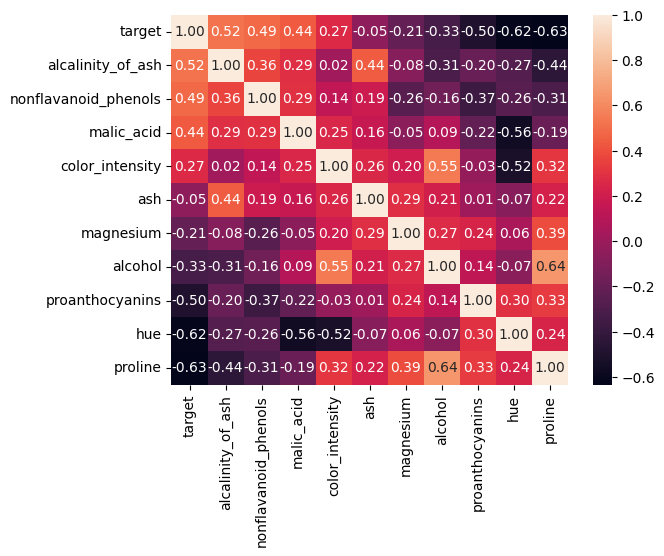

In [93]:
sns.heatmap(df[top_corr.index].corr(), annot=True, fmt=".2f")

plt.show()

In [94]:
df.isna().sum()

,0
alcohol,0
malic_acid,0
ash,0
alcalinity_of_ash,0
magnesium,0
total_phenols,0
flavanoids,0
nonflavanoid_phenols,0
proanthocyanins,0
color_intensity,0


In [95]:
X = df[top_corr.index].drop("target", axis=1)
y = df["target"]

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [97]:
# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)
# X_test = scalar.transform(X_test)

pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("model", GaussianNB())
])

In [98]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('model', GaussianNB())])

In [99]:
print("Training Score:", pipeline.score(X_train, y_train))
print("Testing Score:", pipeline.score(X_test, y_test))

Training Score: 0.971830985915493
Testing Score: 0.9722222222222222


In [100]:
g_pred = pipeline.predict(X_test)

In [101]:
print("Classification report:", classification_report(y_test, g_pred))

Classification report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.93      0.96        14
           2       0.93      1.00      0.97        14

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



# **♦ Model is decently trained**

# **Naive Bayes (MultinomialNB)**

In [102]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
df = pd.read_csv("drive/MyDrive/Colab_Projects/emails.csv")

In [104]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [105]:
df.size

11456

In [106]:
df["spam"].value_counts()

,count
spam,
0,4360
1,1368


In [107]:
df.isna().sum()

,0
text,0
spam,0


In [108]:
X = df["text"]
y = df["spam"]

**Converting the text to numeric**

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [110]:
from sklearn.feature_extraction.text import CountVectorizer

# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(X_train)
# X_test = vectorizer.transform(X_test)

pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("model", MultinomialNB())
])

In [111]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('model', MultinomialNB())])

In [112]:
pipeline.predict(X_test)

array([0, 0, 1, ..., 0, 1, 1])

In [113]:
print("Training Score:", pipeline.score(X_train, y_train))
print("Testing Score:", pipeline.score(X_test, y_test))

Training Score: 0.9958533391532082
Testing Score: 0.993891797556719


In [114]:
print(classification_report(y_test, pipeline.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       871
           1       0.98      1.00      0.99       275

    accuracy                           0.99      1146
   macro avg       0.99      0.99      0.99      1146
weighted avg       0.99      0.99      0.99      1146



# **♦ The model is trained perfectly**